In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\asus\OneDrive\Escritorio\Bootcamp\Temario\Modulo_3\Aprendizaje_supervisado_Clasificación_y_su_implementación_en_AzureML\insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [5]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [6]:
df['region'] = df['region'].map({'northwest': 0, 'northeast': 1, 'southwest': 2, 'southeast': 3})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [8]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size = 0.2)

#### ElasticNet

In [10]:
#Librerías
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as mse
#Inicializamos modelo y parámetros
alpha = 0.1 #Parámetro que mide el peso que tienen los regularizadores frente a la función original
l1_ratio = 0.1 #Parámetro que mide el tradeoff entre el peso l1 y el l2
#Instanciamos el modelo
model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 0)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_ElasticNet = mse(y_test, y_pred) 
# mse_ElasticNet = np.sum((y_test-model.predict(X_test))**2)/1000
print(mse_ElasticNet)

42537594.521635026


#### Stochastic Gradient Descent


In [11]:
#Librerías
from sklearn.linear_model import SGDRegressor
#Inicializamos modelo y parámetros
penalty = 'elasticnet' #Elegimos entre penalización 'l2', 'l1' o 'elasticnet'
alpha = .1 #Parámetro que mide el peso que tienen los regularizadores frente a la función original
l1_ratio = .1 #Parámetro que mide el tradeoff entre el peso l1 y el l2
#Instanciamos el modelo
model = SGDRegressor(penalty = penalty, alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 0)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, y_train)
mse_SGDRegressor = mse(y_test,model.predict(X_test))
print(mse_SGDRegressor)

3.6138834474107766e+18


#### Support Vector Regression

In [12]:
#Librerías
from sklearn import svm
#Inicializamos modelo y parámetros
C = 1 #Parámetro regularizador
kernel = 'rbf' #Núcleo transformador
#Instanciamos el modelo
model_svr = svm.SVR(C = C, kernel = kernel)
#Entrenamos modelo y elaboramos predicciones
model_svr.fit(X_train, y_train)
mse_SVR = mse(y_test,model_svr.predict(X_test))
print(mse_SVR)

137117363.12012476


#### Random Forest

In [40]:
#Librerías
from sklearn.ensemble import RandomForestRegressor
#Inicializamos modelo y parámetros
n_estimators = 200 #Estimadores del modelo
criterion = 'squared_error' #Forma de calcular el error
max_depth = None #Límite de profundidad de los árboles
min_samples_split = 2 #Criterio de parada de profundidad
verbose = 1 #Información devuelta por el método
#Instanciamos el modelo
model = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, verbose=verbose)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train, y_train)
mse_RF = mse(y_test,model.predict(X_test))
print(mse_RF)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


23275314.07799123


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


#### Boosting: *Gradient Descent*

In [41]:
#Librerías
import xgboost as xgb
#Inicializamos modelo y parámetros
params = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "reg:squarederror", "nthread":2}
num_boost_round = 10
#Convertimos los datos a formato DMatrix
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)
#Instanciamos el modelo, entrenamos y elaboramos predicciones
model = xgb.train(params = params, dtrain = train_data, num_boost_round=num_boost_round)
mse_XGB = mse(y_test,model.predict(test_data))
print(mse_XGB)

21845078.164033532


#### Comparativa de resultados

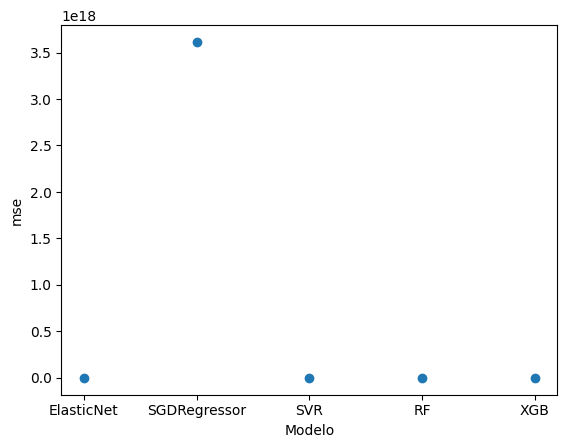

In [42]:
mse = [mse_ElasticNet, mse_SGDRegressor, mse_SVR, mse_RF, mse_XGB]
plt.scatter(['ElasticNet', 'SGDRegressor', 'SVR', 'RF', 'XGB'], mse)
plt.ylabel('mse')
plt.xlabel('Modelo');

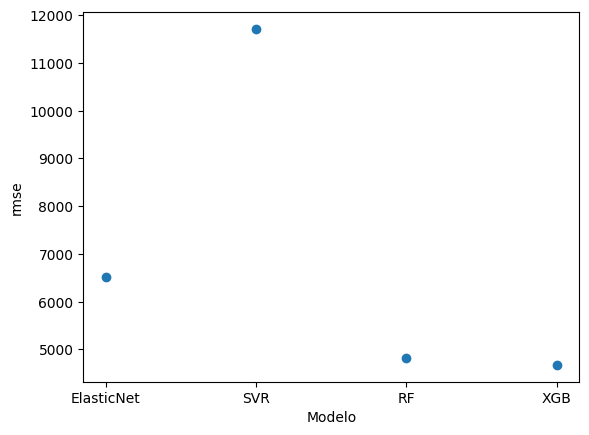

In [44]:
rmse = [mse_ElasticNet**0.5, mse_SVR**0.5, mse_RF**0.5, mse_XGB**0.5]
plt.scatter(['ElasticNet', 'SVR', 'RF', 'XGB'], rmse)
plt.ylabel('rmse')
plt.xlabel('Modelo');

## Predicción aleatoria

### Modelo Xgb

In [54]:
paciente = pd.DataFrame(data=[[30, 1, 28.5, 2, 0, 3]],columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

In [55]:
paciente_data = xgb.DMatrix(paciente)

In [56]:
model.predict(paciente_data)

array([6559.4707], dtype=float32)

### Modelo Svr

In [16]:
paciente2 =[[30, 1, 28.5, 2, 0, 3]]

In [17]:
model_svr.predict(paciente2)

c:\Users\asus\OneDrive\Escritorio\Bootcamp\mi_entorno\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([9204.105239])

### Guardamos el modelo

In [18]:
import pickle

pickle.dump(model_svr, open('modelo_chulo.pkl', 'wb'))

In [19]:
modelo_chulo1= pickle.load(open('modelo_chulo.pkl', 'rb'))